In [1]:
import sys
sys.path.append('../')

import torch
import numpy as np
import matplotlib.pyplot as plt
import h5py

import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)

from utils.load_trained_model import load_model_from_checkpoint
%matplotlib inline

### Load model

In [2]:
ckpt = 'checkpoints/photoz_finetuned_model.pth.tar'
model = load_model_from_checkpoint(ckpt)

INFO:root:Loading checkpoint checkpoints/photoz_finetuned_model.pth.tar
INFO:root:Chekpoint loaded. Checkpoint epoch 64


### Load data

In [3]:
data = h5py.File('datasets/sdss_w_specz_valid.h5', 'r')

In [4]:
print("Data keys:", data.keys())
print("Images shape:", data['images'].shape)

Data keys: <KeysViewHDF5 ['ObjID', 'dec', 'e_bv', 'images', 'ra', 'specObjID', 'specz_redshift', 'specz_redshift_err']>
Images shape: (102993, 5, 107, 107)


### Inference

Obtain pdf-z for the first 16 imges in the validation dataset.
Note that we train the model on 64x64 images while in this example (for illustration purposes) we apply the model on the 107x107 images.

In [5]:
with torch.no_grad():
    pdfs = model(torch.tensor(data['images'][0:16]).to(torch.cuda.current_device())).cpu().detach().numpy()

Plot the pdf of the first galaxy:

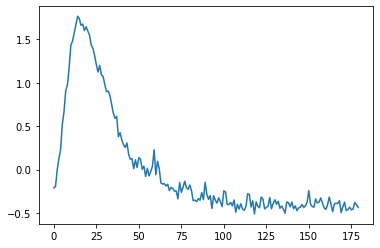

In [6]:
plt.plot(pdfs[0]);